## Creating figures with Plotly

In [1]:
import pandas as pd
import numpy as np

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

## Read in the titanic dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/austinlasseter/plotly_dash_tutorial/master/00%20resources/titanic.csv")
print(df.shape)
df.head()

(712, 7)


,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,0,3,male,22.0,7.2500,Southampton
1,1,1,1,female,38.0,71.2833,Cherbourg
2,2,1,3,female,26.0,7.9250,Southampton
3,3,1,1,female,35.0,53.1000,Southampton
4,4,0,3,male,35.0,8.0500,Southampton


## Let's make a bar chart

In [4]:
# What's the average age of passengers, by sex?
results=df.groupby('Sex')['Age'].mean()
print(results)

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64


In [5]:
# Break that down into its components
print(results.index[0])
print(results.index[1])
print(results[0])
print(results[1])

female
male
27.7451737452
30.7266445916


In [6]:
# Let's display that with Plotly.
mydata = [go.Bar(
    x=results.index,
    y=results
)]

mylayout = go.Layout(
    title='Male passengers were a little older, on average'
)
fig = go.Figure(data=mydata, layout=mylayout)
iplot(fig)

In [7]:
# Let's add a little formatting.
mydata = [go.Bar(
    x=results.index,
    y=results,
    marker=dict(color=['rgba(100,100,500,1)', 'rgba(222,45,38,0.8)']), # why is color in 'data' rather than 'format'?
    text = ['Average female: {}years'.format(round(results[0], 1)), 
            "Average male: {} years".format(round(results[1], 1))],
    hoverinfo = 'text',
)]

mylayout = go.Layout(
    title='Male passengers were a <b>little older</b>, <i>on average</i>', 
    xaxis=dict(title = 'Were they female or male?'),
    yaxis=dict(title = 'How old were they?'),
    font=dict(family='Open Sans, sans-serif', size=12, color='white'),
    autosize=False,
    width=500,
    height=400,
    margin=dict(
        l=80,
        r=80,
        b=100,
        t=100,
        pad=2
    ),
    paper_bgcolor='#7f7f7f',
    plot_bgcolor='#c7c7c7'
)
fig = go.Figure(data=mydata, layout=mylayout)
iplot(fig)

### Grouped bar chart

In [8]:
results=pd.DataFrame(df.groupby(['Sex', 'Embarked'])['Fare'].mean())
results

Fare
Sex    Embarked              
female Cherbourg    79.937502
       Queenstown   17.363892
       Southampton  38.572827
male   Cherbourg    58.005683
       Queenstown   18.942187
       Southampton  21.867706

In [9]:
# So to better understand how this works, we need to know multi-indexing.
print(results.loc['male'].index)
results.loc['male']['Fare']

Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object', name='Embarked')


Embarked
Cherbourg      58.005683
Queenstown     18.942187
Southampton    21.867706
Name: Fare, dtype: float64

Great link about multi-indexing:
https://www.somebits.com/~nelson/pandas-multiindex-slice-demo.html

In [10]:
# Let's display that with plotly.
mydata1 = go.Bar(
    x=results.loc['male'].index,
    y=results.loc['male']['Fare'],
    name='Male',
    marker=dict(color='darkgreen')
)
mydata2 = go.Bar(
    x=results.loc['female'].index,
    y=results.loc['female']['Fare'],
    name='Female',
    marker=dict(color='lightblue')
)

mylayout = go.Layout(
    title='Grouped bar chart',
    xaxis = dict(title = 'Port of Embarkation'), # x-axis label
    yaxis = dict(title = 'Number of Passengers'), # y-axis label
    
)
fig = go.Figure(data=[mydata1, mydata2], layout=mylayout)
iplot(fig)

### How about a scatterplot?

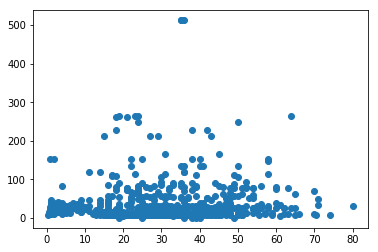

In [11]:
# First in good ol' Matplotlib.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=df['Age'], y=df['Fare']);

In [12]:
# Now with plotly.
data = [go.Scatter(x=df['Age'], 
                   y=df['Fare'],
                    mode = 'markers',
)]
layout = go.Layout(
    title = 'Two passengers in their mid-30s bought some expensive tickets!', 
    xaxis = dict(title = 'Age'), 
    yaxis = dict(title = 'Fare'), 
    hovermode ='closest' # without this, all your hover text will appear on the x-axis, which is tough to read.
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Logistic Regression analysis

In [13]:
# Make some dummies for sex
dummy=pd.get_dummies(df['Sex'])
dummy.head()
df=pd.concat([df,dummy],axis=1)
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,female,male
0,0,0,3,male,22.0,7.2500,Southampton,0,1
1,1,1,1,female,38.0,71.2833,Cherbourg,1,0
2,2,1,3,female,26.0,7.9250,Southampton,1,0
3,3,1,1,female,35.0,53.1000,Southampton,1,0
4,4,0,3,male,35.0,8.0500,Southampton,0,1


In [14]:
# Make some dummies Passenger's cabin class
dummy=pd.get_dummies(df['Pclass'], prefix='pclass')
dummy.head()
df=pd.concat([df,dummy],axis=1)
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3
0,0,0,3,male,22.0,7.2500,Southampton,0,1,0,0,1
1,1,1,1,female,38.0,71.2833,Cherbourg,1,0,1,0,0
2,2,1,3,female,26.0,7.9250,Southampton,1,0,0,0,1
3,3,1,1,female,35.0,53.1000,Southampton,1,0,1,0,0
4,4,0,3,male,35.0,8.0500,Southampton,0,1,0,0,1


In [15]:
# What are the possible features?
df.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'female', 'male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [16]:
# Missing values will skew the regression
print(df.shape)
df = df.dropna()
print(df.shape)

(712, 12)
(712, 12)


In [17]:
# Select our features
feature_cols = ['Pclass', 'male', 'Fare', 'Age']
X = df[feature_cols]
y = df.Survived

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e-2, penalty='l1')
logreg.fit(X, y)
results=pd.DataFrame(list(zip(feature_cols, logreg.coef_[0])), columns=['feature', 'coefficient'])
results

,feature,coefficient
0,Pclass,-0.007763
1,male,0.000000
2,Fare,0.014557
3,Age,-0.026067


In [19]:
# Let's display that with Plotly.
mydata = [go.Bar(
    x=results['feature'],
    y=results['coefficient']
)]

mylayout = go.Layout(
    title='Younger passengers who paid higher fares were more likely to survive'
)
fig = go.Figure(data=mydata, layout=mylayout)
iplot(fig)

## OLS Regression Analysis

In [20]:
# Make a dummy for embarkation
dummy=pd.get_dummies(df['Embarked'])
dummy.head()
df=pd.concat([df,dummy],axis=1)
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3,Cherbourg,Queenstown,Southampton
0,0,0,3,male,22.0,7.2500,Southampton,0,1,0,0,1,0,0,1
1,1,1,1,female,38.0,71.2833,Cherbourg,1,0,1,0,0,1,0,0
2,2,1,3,female,26.0,7.9250,Southampton,1,0,0,0,1,0,0,1
3,3,1,1,female,35.0,53.1000,Southampton,1,0,1,0,0,0,0,1
4,4,0,3,male,35.0,8.0500,Southampton,0,1,0,0,1,0,0,1


In [21]:
# Select new features
feature_cols = ['pclass_1', 'pclass_2', 'male', 'Age', 'Cherbourg', 'Queenstown']
X = df[feature_cols]
y = df['Fare']

In [22]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X, y)
print(ols.coef_)
results=pd.DataFrame(list(zip(feature_cols, ols.coef_)), columns=['feature', 'coefficient'])
results

[ 74.84917573   9.30749579  -9.73434891  -0.42455622  13.63443653
   0.51132071]


,feature,coefficient
0,pclass_1,74.849176
1,pclass_2,9.307496
2,male,-9.734349
3,Age,-0.424556
4,Cherbourg,13.634437
5,Queenstown,0.511321


In [23]:
# Let's display that with Plotly.
mydata = [go.Bar(
    x=results['feature'],
    y=results['coefficient']
)]

mylayout = go.Layout(
    title='Passengers who embarked in Cherbourg paid slightly higher fares than those from Southampton',
    xaxis = dict(title = 'Passenger Features'), 
    yaxis = dict(title = 'Difference in fare (in $)'), 
)
fig = go.Figure(data=mydata, layout=mylayout)
iplot(fig)